In [9]:
! pip install -U backtrader yfinance

Requirement already up-to-date: backtrader in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (1.9.74.123)


In [1]:
import backtrader
from datetime import datetime
import numpy
import pandas

In [2]:
# 建立交易策略
class Class_For_Build_Customize_Strategy_Object(backtrader.Strategy):
    def __init__(self):

        #self.date_time = self.datas[0].todate
        self.data_open = self.datas[0].open
        self.data_high = self.datas[0].high
        self.data_low = self.datas[0].low
        self.data_close = self.datas[0].close
        self.data_volume = self.datas[0].volume
           
    def next(self):

        data_fram = pandas.DataFrame({
                                     "Open Price": self.data_open[0],
                                     "High Price": self.data_high[0],
                                     "Low Price": self.data_low[0],
                                     "Close Price": self.data_close[0],
                                     "Transection Volumn": self.data_volume[0]
                                     },index=[0])
        print(data_fram)
        


In [3]:
Trading_Object_Name = "NQ=F"
Trading_DateTime_Start = datetime(2017,1,1)
Trading_DateTime_End = datetime(2019,12,22)

Im_Data = backtrader.feeds.YahooFinanceData(
            dataname = Trading_Object_Name , 
            fromdate=Trading_DateTime_Start, 
            todate=Trading_DateTime_End)    

In [4]:
class PandasData(backtrader.feed.DataBase):
    '''
    The ``dataname`` parameter inherited from ``feed.DataBase`` is the pandas
    DataFrame
    '''

    params = (
        # Possible values for datetime (must always be present)
        #  None : datetime is the "index" in the Pandas Dataframe
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('datetime', None),

        # Possible values below:
        #  None : column not present
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', -1),
        ('volume', -1)
    )
    

In [5]:
#使用 yfinance 產生交易資料
import yfinance 

data = yfinance.download("MSFT",  interval = "5m",start="2020-04-01", end="2020-04-20")
Im_Data = backtrader.feeds.PandasData(dataname=data)

[*********************100%***********************]  1 of 1 completed


In [6]:
#使用 backtrader Cerebro() 產生策略物件
This_is_trading_object = backtrader.Cerebro()

# 使用 addstrategy 對實例塞入 策略
This_is_trading_object.addstrategy(Class_For_Build_Customize_Strategy_Object)

# 使用 adddata 對實例塞入 資料
This_is_trading_object.adddata(Im_Data)

# 使用 run運行交易物件
This_is_trading_object.run()

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  154.179993  155.270004  154.089996   155.160004           3598188.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  155.050003  156.149994  155.050003   155.440002           1520107.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  155.463898  155.699997  155.070007   155.070007           1080293.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  155.110001  155.110001  154.184998   154.479904            965119.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  154.390701  155.065002  154.390701   154.949997            927495.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0       155.0  155.570404  154.919998   154.940002            898911.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0       155.0  155.479996  154.740005   154.740005            704357.0
   Ope

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  151.490005  151.679993  151.179993   151.419098            582013.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  151.429993  151.589996  151.240005   151.380005            526254.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  151.369995  151.970001  151.360107   151.899994            562290.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  151.909897  151.909897  151.395004   151.660004            539159.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  151.679993  151.690002  151.190002   151.205002            556924.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  151.199997  151.910004  151.190002   151.630005            781643.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  151.639297  151.669998  151.039993   151.130005            762892.0
   Ope

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  153.195999  153.580002  152.950104   153.550003            357516.0
   Open Price  High Price  Low Price  Close Price  Transection Volumn
0  153.539993  153.539993     152.75   152.940002            343422.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  152.949905  152.975006  151.970001   152.319504            400066.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  152.309998  152.410004  151.884995   151.929993            361756.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  151.970001  152.505005  151.570007   152.419998            505838.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  152.404999       152.5  151.380005   151.380005            443163.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0    151.3909  151.960007  151.300003   151.457001            523108.0
   Open 

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  153.632706  153.949997  153.335007   153.475006            344596.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  153.494995  153.800003  153.380005   153.735001            322016.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  153.729996  153.770004  153.380005   153.755798            322945.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0      153.75  153.789993  153.009995   153.156906            355889.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  153.149994  153.369995  153.059998   153.220001            315940.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  153.210007  153.630005  153.169998   153.561707            268462.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0    153.5625      153.75  153.419998   153.595001            329937.0
   Ope

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  161.149994  161.464996  160.955002   161.190002            632494.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  161.190002  161.300003  160.979996   161.186905            417699.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  161.190002  161.350006  160.949997   160.960007            660210.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  160.955002  161.320007  160.955002   161.279999            397156.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  161.259995  161.330002  161.009995   161.066406            361674.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  161.059998  161.119995  160.729996   160.949997            465594.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  160.960007  161.369995  160.929993   161.215805            393634.0
   Ope

   Open Price  High Price  Low Price  Close Price  Transection Volumn
0       167.0  168.020004      167.0   167.990707           1843643.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  168.130005  168.279999  167.839996   167.839996           1373063.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  167.839996  168.410004  167.839996   168.029999           1246595.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  168.110001  168.110001  167.589996   167.759995           1255507.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  167.720993  168.089996  166.680099   166.970001           1121052.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  166.979996  167.160004  165.699997   165.836899           1328871.0
   Open Price  High Price  Low Price  Close Price  Transection Volumn
0  165.830002  165.990005     164.75   165.610001           1767034.0
   Open Pr

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.833694  165.210007  164.720306   164.785507            458432.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.768997  164.899994  164.080002   164.313095            503828.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.309998  164.710007  164.059998   164.425003            540788.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.479996  165.100006  164.300003   164.990005            624482.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.001007  165.529999  164.759995   165.421005            568030.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.449997  166.160004  165.380005   165.979996            657513.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.960007  166.190002  165.066803   165.110001            605122.0
   Ope

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.360001  165.699997  165.210007   165.379898            462726.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.369995  165.479996  165.100006   165.339996            341521.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.335007  165.470001  165.139999   165.300003            327370.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.298004  165.360001  164.919998   164.976303            422420.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.984497  165.009995  164.550003   164.614197            430431.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.617996      164.75  164.179993   164.309998            572883.0
   Open Price  High Price  Low Price  Close Price  Transection Volumn
0  164.320007  164.458099      164.0   164.300003            538990.0
   Open 

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.919998  165.400101  164.910004   165.380005            416376.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0     165.375  165.389999  165.119995   165.220001            295556.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.220001      165.25  164.880005   165.179993            287622.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.184998  165.330002  164.970001   165.279999            380406.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.282196  165.289993  164.876907   164.919998            282473.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.919998  164.970001  164.550003   164.589996            338517.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.589996  164.910004  164.539993   164.570007            265869.0
   Ope

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0     163.875  164.089996  163.419998   163.440002            566960.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  163.440002  163.720001  163.110001   163.589996            590183.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  163.570007    163.7854  163.300003   163.600006            408223.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  163.600006  163.720001  163.009995   163.164993            436175.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  163.169998  163.389999  163.029999   163.122803            308490.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  163.199997  163.460007  163.149994   163.166794            547990.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  163.170105  163.360001  162.889999   163.089996            586638.0
   Ope

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  163.521393      164.25  163.399994   164.240005            794716.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.240005  164.865005  164.080002   164.800003            829825.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.785004  164.929001  164.350006   164.899994            701181.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  164.880005  165.070007  164.610001   165.050003            714847.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  165.059998  165.430099  163.580002   165.240005           1644525.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0      165.25  165.570007  164.919998   165.509995           1485783.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  168.639999  169.240005  168.300003   169.240005           2756620.0
   Ope

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  173.220001  173.550003  173.210007   173.365799            535463.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  173.369995  173.479996  173.229996   173.304993            239965.0
   Open Price  High Price  Low Price  Close Price  Transection Volumn
0  173.320007  173.399994      173.0   173.330002            309682.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  173.309998  173.570007  173.210007   173.490005            392904.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  173.490005  173.669998  173.289993   173.419998            376466.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  173.410004  173.589996  173.285004   173.539597            401070.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  173.529999  173.690002  173.380005   173.570007            314273.0
   Open 

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  172.509995  172.699997  172.169998   172.190002            313870.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  172.199997  172.199997  171.820007   171.919998            336076.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  171.919998  172.199799  171.919998   172.190002            307459.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  172.179993  172.309998  171.960007   172.080002            304110.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  172.059998  172.070007  171.860001   172.009995            252667.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  172.029999  172.089996  171.850693   172.020004            264108.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  172.009003  172.009995  171.794998   171.805893            262939.0
   Ope

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  176.485001  176.660004  175.910004   175.972198            570724.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  175.979996       176.0  175.419998   175.539993            470474.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  175.570007  175.740005  175.309998   175.350098            360865.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  175.355698  175.389999  174.529999   174.648407            606162.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  174.654999  174.679993  174.130005   174.270004            588836.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  174.300003  174.645004  174.160004   174.460007            367023.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  174.479797  174.479797  173.229996   173.559998            586180.0
   Ope

   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  178.830002       179.0  178.559998   178.589996            570842.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  178.600006  178.729996  178.300003   178.460007            455832.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  178.455002       178.5  177.960007   178.392899            643145.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  178.397705  178.649994  178.169998   178.229996            390890.0
   Open Price  High Price  Low Price  Close Price  Transection Volumn
0  178.220001  178.279999   177.7901   177.820007            502554.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  177.815002  178.018997  177.679993   177.940002            519091.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  177.940002  178.229996  177.869995   177.914993            472399.0
   Open 

   Open Price  High Price  Low Price  Close Price  Transection Volumn
0  177.690002  177.759995      177.5   177.559998            538643.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  177.570007  177.660004  176.910004   177.210007            696439.0
   Open Price  High Price  Low Price  Close Price  Transection Volumn
0  177.175003  177.740005    177.125   177.550003            840860.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  177.630005      178.75  177.630005   178.384995           2397300.0
   Open Price  High Price   Low Price  Close Price  Transection Volumn
0  178.380005  178.740005  177.800003   178.699997           2522181.0


In [7]:
import matplotlib
import matplotlib.pyplot
# Build Instance and draw single plot
#為了將GUI圖形顯示在 Jupyter notebook 
%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/backtrader/plot/__init__.py:30: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('TkAgg')
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/backtrader/plot/plot.py:127: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('nbagg')


<Figure size 1728x1080 with 0 Axes>

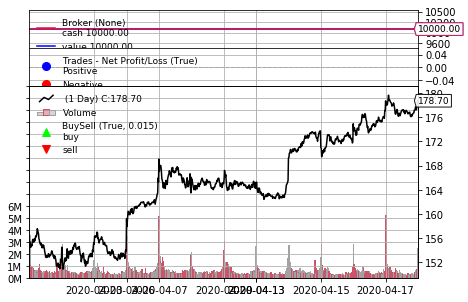

In [8]:
figure = matplotlib.pyplot.figure(figsize=(24.0, 15.0))
figure = This_is_trading_object.plot()[0][0]
matplotlib.pyplot.close(figure)
matplotlib.pyplot.close("all")